In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('IndustryBiscuit/annotations.csv')
label_counts = df['classCode'].value_counts()
label_counts = label_counts.reset_index().sort_values(by='classCode').rename(columns={'count': 'Frequency'})
label_counts

,classCode,Frequency
0,0,1896
1,1,1860
2,2,632
3,3,512


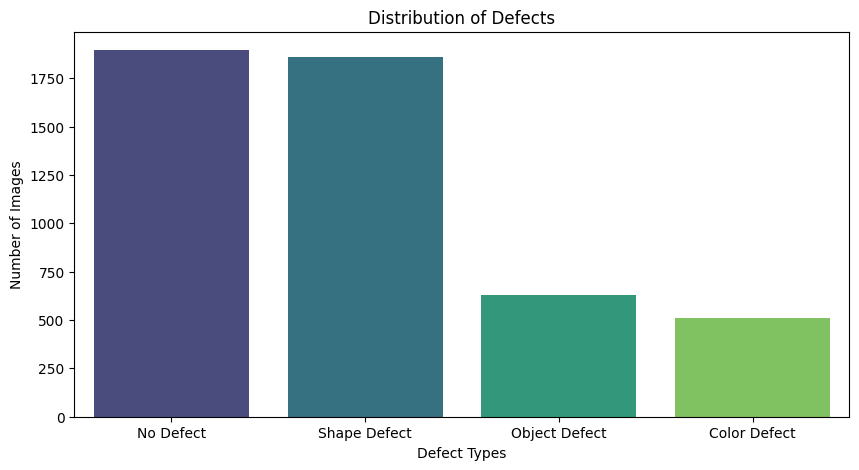

In [3]:
# Plot the distribution of labels
plt.figure(figsize=(10, 5))
sns.barplot(x='classCode', y='Frequency', data=label_counts, palette='viridis')
plt.xlabel('Defect Types')
plt.ylabel('Number of Images')
plt.title('Distribution of Defects')
plt.xticks(range(4), ['No Defect', 'Shape Defect', 'Object Defect', 'Color Defect'])
plt.show()

In [4]:
train_df = pd.read_csv('data/labels/train.csv')
valid_df = pd.read_csv('data/labels/valid.csv')
test_df = pd.read_csv('data/labels/test.csv')

print(f'Training Set : {len(train_df)}')
print(f'Validation Set : {len(valid_df)}')
print(f'Testing Set : {len(test_df)}')

Training Set : 3525
Validation Set : 883
Testing Set : 492


In [5]:
im_1 = Image.open(f'data/images/train/no_defect/{train_df[train_df["label"] == 0]["image"].sample(1).values[0]}')
im_2 = Image.open(f'data/images/train/shape_defect/{train_df[train_df["label"] == 1]["image"].sample(1).values[0]}')
im_3 = Image.open(f'data/images/train/object_defect/{train_df[train_df["label"] == 2]["image"].sample(1).values[0]}')
im_4 = Image.open(f'data/images/train/color_defect/{train_df[train_df["label"] == 3]["image"].sample(1).values[0]}')

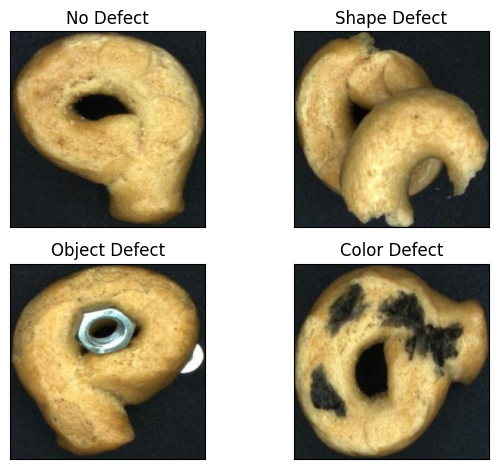

In [6]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(im_1, cmap='gray')
axes[0, 0].set_title('No Defect')

axes[0, 1].imshow(im_2, cmap='gray')
axes[0, 1].set_title('Shape Defect')

axes[1, 0].imshow(im_3, cmap='gray')
axes[1, 0].set_title('Object Defect')

axes[1, 1].imshow(im_4, cmap='gray')
axes[1, 1].set_title('Color Defect')

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

# Weak Baseline

In [7]:
pred = train_df['label'].value_counts().idxmax()

In [8]:
y_pred = np.full(len(test_df), pred)
y_true = test_df['label']

In [9]:
print(classification_report(y_true, y_pred, zero_division=0))
print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.39      1.00      0.56       190
           1       0.00      0.00      0.00       186
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00        52

    accuracy                           0.39       492
   macro avg       0.10      0.25      0.14       492
weighted avg       0.15      0.39      0.22       492

Accuracy : 0.39
